# Final Project (Capstone Project)

## The Financial Analyst Challenge: Analyze and advice on a Client´s portfolio

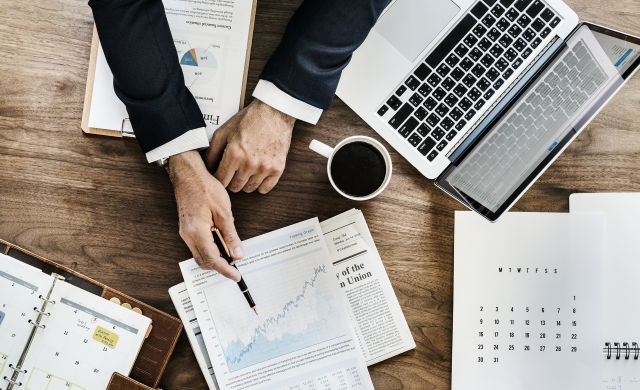

## Welcome to the Final Project!

This challenge requires you to __apply__ and __combine__ many concepts and methods that you have learned in this course.

This scenario could be a real-world case in the life of a Financial Analyst / Advisor. It requires a combination of <br>
- solid __coding skills__, <br><br>
- some __background knowledge in Finance/Investment__ (all you need to know is teached in the course)
and, even more important <br><br>
   
- the ability to __interpret__ and __understand__ the __underlying data and the client´s requests__ and the ability to __incorporate the Client´s inputs__ into your analysis <br> <br>
__Combining Expertise / hard Skills with case-specific Judgement__ -> requires some practise but also some talent. 

### The Case

It´s your first day as Financial Analyst in an Asset Management Firm that manages the Portfolios of High Net Worth Individuals (HNWI). <br><br>
Your Boss recently solicited a new Client, Mary Johnson, 65 years old. Marie recently retired after 30 Years as an independent physician. Her husband died soon and bequeathed a considerable Investment Portfolio to her. <br><br>
From 1997 until today she has been solely invested into __5 Health Care Stocks__, that are today the __most valuable__ Health Care Stocks in the US Market in terms of __Market Capitalization__. She strongly believes that it´s best to only invest into sectors where she has specific industry expertise (Health Care). She only trusts the largest and best-known companies in the market. Her Strategy has been pretty simple: Buying an __equal number of shares__ of each Stock and __reinvesting all dividends__ (assume no costs and taxes). <br> <br> 
Now that she has retired with no active work income (she needs to live from her Investment Portfolio), Mary decided to make her portfolio more suitable to the new situation. In a very first step, she agreed with your boss to sell parts of her five-Stocks Portfolio and invest into lower risk Government Bonds and high-quality Corporate Bonds.   <br> <br>
Now, as a next second step, it´s your task to guide her into a __more diversified Stock Portfolio that better reflects Modern Portfolio Theory__.   

---------------------------------------------------------------------

### Now it´s your Turn!

__Step 1: Identify the five stocks and get the respective Stock Tickers__! (use the __listings_clean.csv__ file)

----------------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import cufflinks as cf

In [2]:
pd.read_csv("listings_clean.csv", index_col= "Symbol")

,Exchange,Name,Last_Price,Market_Cap,IPO_Year,Sector,Industry
Symbol,,,,,,,
A,NYSE,"Agilent Technologies, Inc.",81.68,2.593470e+10,1999,Capital Goods,Biotechnology: Laboratory Analytical Instruments
AA,NYSE,Alcoa Corporation,29.15,5.407810e+09,2016,Basic Industries,Aluminum
AABA,NASDAQ,Altaba Inc.,75.39,4.278113e+10,1969,Technology,EDP Services
AAC,NYSE,"AAC Holdings, Inc.",2.16,5.314109e+07,2014,Health Care,Medical Specialities
AAL,NASDAQ,"American Airlines Group, Inc.",34.02,1.527687e+10,1969,Transportation,Air Freight/Delivery Services
...,...,...,...,...,...,...,...
ZUMZ,NASDAQ,Zumiez Inc.,26.72,6.819191e+08,2005,Consumer Services,Clothing/Shoe/Accessory Stores
ZUO,NYSE,"Zuora, Inc.",19.79,2.147266e+09,2018,Technology,Computer Software: Prepackaged Software
ZYME,NYSE,Zymeworks Inc.,15.74,5.040782e+08,2017,Health Care,Major Pharmaceuticals


In [3]:
#JNJ PFE UNH MRK NVS

In [4]:
stocks = yf.download(["JNJ","PFE","UNH","MRK","NVS"], start= "1996-12-31", end= "2018-12-31").Close
stocks.head()

[*********************100%***********************]  5 of 5 completed


,JNJ,MRK,NVS,PFE,UNH
Date,,,,,
1996-12-31,24.8750,37.989025,25.761648,13.124605,5.625000
1997-01-02,24.8750,38.108303,25.593637,12.946711,5.656250
1997-01-03,25.1250,39.420322,25.425627,13.223435,5.812500
1997-01-06,25.3125,39.539600,25.369623,13.164137,5.828125
1997-01-07,25.3750,39.599236,25.425627,13.361796,5.843750


In [5]:
stocks["AGG_price"] = stocks.agg(func="sum", axis= 1)
stocks.head()

,JNJ,MRK,NVS,PFE,UNH,AGG_price
Date,,,,,,
1996-12-31,24.8750,37.989025,25.761648,13.124605,5.625000,107.375278
1997-01-02,24.8750,38.108303,25.593637,12.946711,5.656250,107.179901
1997-01-03,25.1250,39.420322,25.425627,13.223435,5.812500,109.006885
1997-01-06,25.3125,39.539600,25.369623,13.164137,5.828125,109.213985
1997-01-07,25.3750,39.599236,25.425627,13.361796,5.843750,109.605409


In [6]:
stocks = stocks.drop(columns= ["JNJ","MRK","NVS","PFE","UNH"])

In [7]:
stocks

,AGG_price
Date,
1996-12-31,107.375278
1997-01-02,107.179901
1997-01-03,109.006885
1997-01-06,109.213985
1997-01-07,109.605409
...,...
2018-12-21,550.459221
2018-12-24,536.059475
2018-12-26,556.657932


In [8]:
annual = stocks.resample("A", kind = "period").last()
annual

,AGG_price
Date,
1996,107.375278
1997,149.760090
1998,201.131203
1999,180.969549
2000,240.953659
2001,203.413809
2002,190.518158
2003,199.473965
2004,208.902010


In [9]:
annual["Return"] = np.log(annual.AGG_price/annual.AGG_price.shift())

In [10]:
annual.dropna(inplace=True)

In [11]:
annual

,AGG_price,Return
Date,,
1997,149.760090,0.332705
1998,201.131203,0.294923
1999,180.969549,-0.105629
2000,240.953659,0.286276
2001,203.413809,-0.169362
2002,190.518158,-0.065495
2003,199.473965,0.045936
2004,208.902010,0.046182
2005,221.743376,0.059655


In [12]:
years = annual.index.size
years

22

In [13]:
windows = [year for year in range(years, 0, -1)]
windows

[22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [14]:
for year in windows:
    annual["{}Y".format(year)] = np.exp(year * annual.Return.rolling(year).mean()) * 100  #normalised as what would be the value of 100 in specific years

In [15]:
annual

,AGG_price,Return,22Y,21Y,20Y,19Y,18Y,17Y,16Y,15Y,...,10Y,9Y,8Y,7Y,6Y,5Y,4Y,3Y,2Y,1Y
Date,,,,,,,,,,,,,,,,,,,,,
1997,149.760090,0.332705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139.473529
1998,201.131203,0.294923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187.316118,134.302272
1999,180.969549,-0.105629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.539306,120.839637,89.975870
2000,240.953659,0.286276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,224.403291,160.893105,119.799243,133.145969
2001,203.413809,-0.169362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,189.441938,135.826446,101.134884,112.402230,84.420303
2002,190.518158,-0.065495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,177.432050,127.215574,94.723322,105.276362,79.068381,93.660386
2003,199.473965,0.045936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,185.772710,133.195676,99.176041,110.225154,82.785198,98.063138,104.700763
2004,208.902010,0.046182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,194.553172,139.491108,103.863551,115.434895,86.698003,102.698047,109.649396,104.726454
2005,221.743376,0.059655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,206.512504,148.065733,110.248123,122.530767,92.027395,109.010975,116.389628,111.164069,106.147076


In [16]:
triangle = annual.drop(columns=["AGG_price","Return"])
triangle

,22Y,21Y,20Y,19Y,18Y,17Y,16Y,15Y,14Y,13Y,...,10Y,9Y,8Y,7Y,6Y,5Y,4Y,3Y,2Y,1Y
Date,,,,,,,,,,,,,,,,,,,,,
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139.473529
1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187.316118,134.302272
1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.539306,120.839637,89.975870
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,224.403291,160.893105,119.799243,133.145969
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,189.441938,135.826446,101.134884,112.402230,84.420303
2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,177.432050,127.215574,94.723322,105.276362,79.068381,93.660386
2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,185.772710,133.195676,99.176041,110.225154,82.785198,98.063138,104.700763
2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,194.553172,139.491108,103.863551,115.434895,86.698003,102.698047,109.649396,104.726454
2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,206.512504,148.065733,110.248123,122.530767,92.027395,109.010975,116.389628,111.164069,106.147076


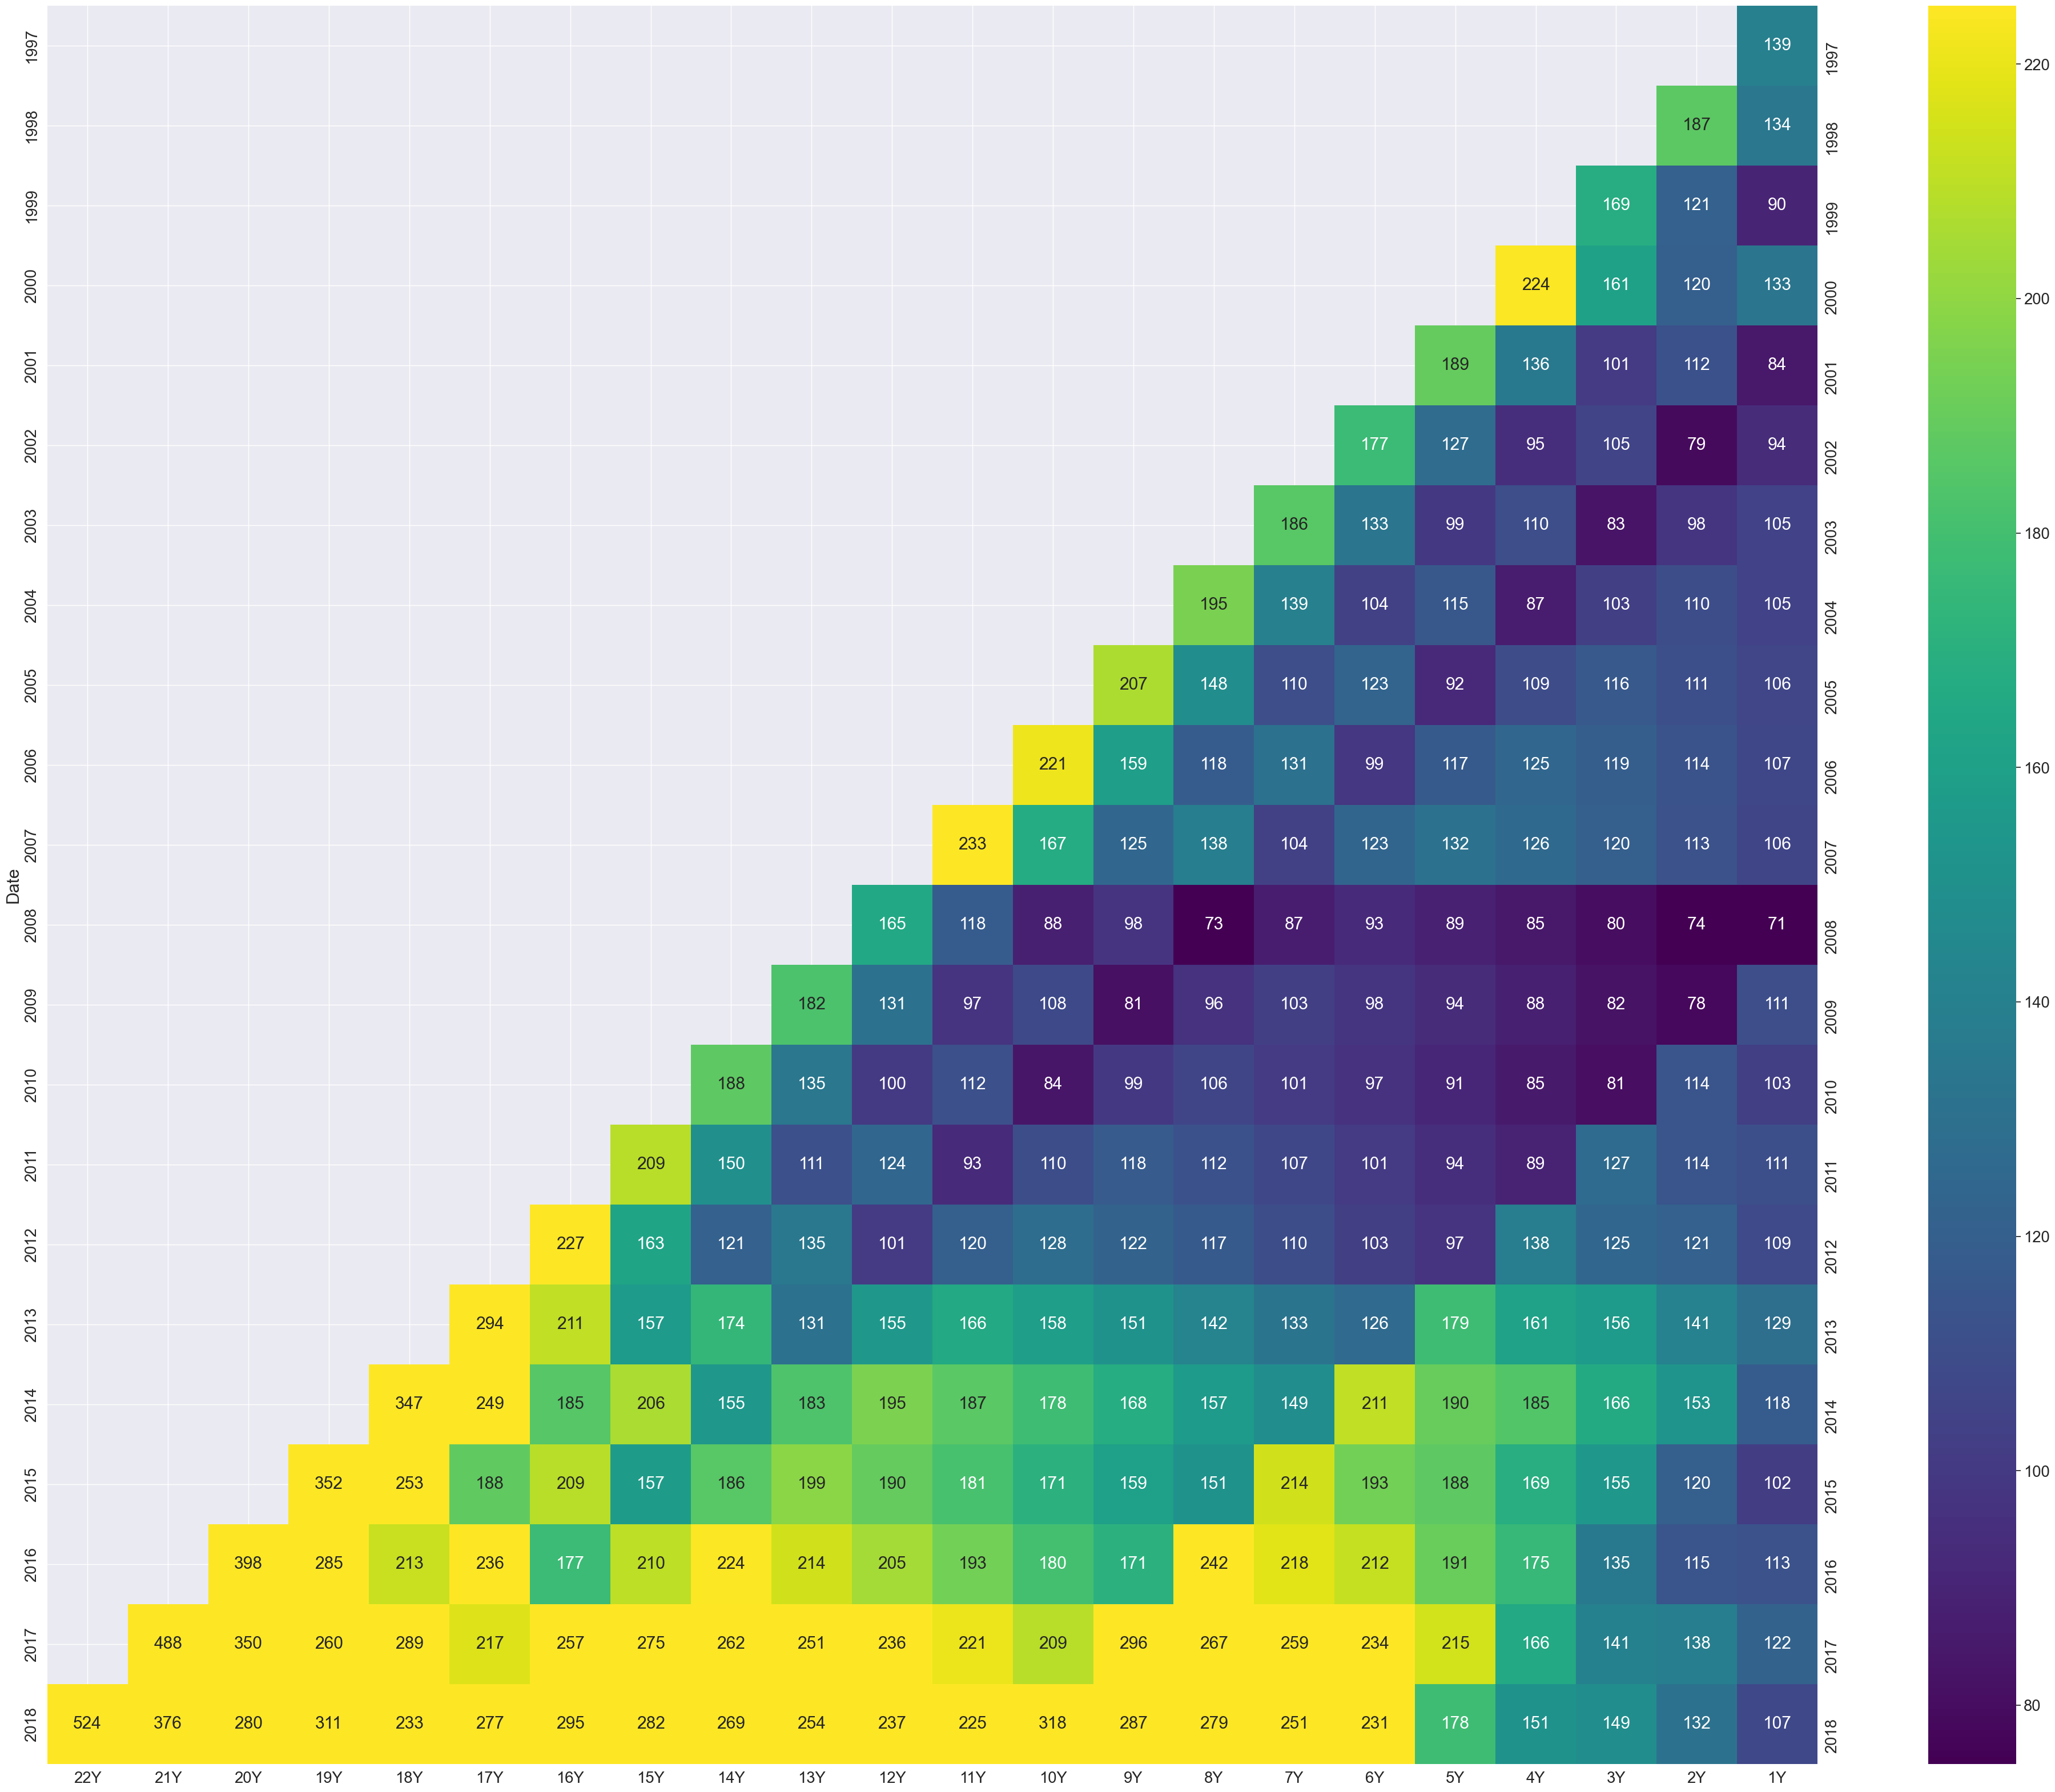

In [17]:
plt.figure(figsize = (50,40))
sns.set(font_scale = 1.8)
sns.heatmap(triangle, cmap="viridis", annot=True, fmt= "0.0f", vmin= 75, vmax= 225, center=150)
plt.tick_params(axis = "y", labelright = True)
plt.show()

__Step 2: Create an appropriate Index from 1997 (hint: start with 1996-12-31) until the end of 2018 that best reflects her strategy and create a normalized Price Chart (with Base Value 100 on 1996-12-31)!__ Hint: Use Yahoo Finance!<br>
(At a first glance: Do you think her Portfolio performed well?)

In [18]:
norm = ((annual.AGG_price/annual.iloc[0,0])*100).to_frame()
norm

,AGG_price
Date,
1997,100.000000
1998,134.302272
1999,120.839637
2000,160.893105
2001,135.826446
2002,127.215574
2003,133.195676
2004,139.491108
2005,148.065733


In [19]:
norm["returns"] = np.log(norm.AGG_price/norm.AGG_price.shift())
norm

,AGG_price,returns
Date,,
1997,100.000000,NaN
1998,134.302272,0.294923
1999,120.839637,-0.105629
2000,160.893105,0.286276
2001,135.826446,-0.169362
2002,127.215574,-0.065495
2003,133.195676,0.045936
2004,139.491108,0.046182
2005,148.065733,0.059655


In [20]:
ret = norm.drop(columns= "AGG_price")
ret

,returns
Date,
1997,NaN
1998,0.294923
1999,-0.105629
2000,0.286276
2001,-0.169362
2002,-0.065495
2003,0.045936
2004,0.046182
2005,0.059655


In [21]:
ret.dropna(inplace=True)

In [22]:
shears = ret.index.size
shears

21

In [23]:
shindows = [shear for shear in range(shears, 0, -1)]
shindows

[21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [24]:
for shear in shindows:
    ret["{}Y".format(shear)] = np.exp(shear * ret.returns.rolling(shear).mean()) * 100

In [25]:
ret

,returns,21Y,20Y,19Y,18Y,17Y,16Y,15Y,14Y,13Y,...,10Y,9Y,8Y,7Y,6Y,5Y,4Y,3Y,2Y,1Y
Date,,,,,,,,,,,,,,,,,,,,,
1998,0.294923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134.302272
1999,-0.105629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.839637,89.975870
2000,0.286276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.893105,119.799243,133.145969
2001,-0.169362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,135.826446,101.134884,112.402230,84.420303
2002,-0.065495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,127.215574,94.723322,105.276362,79.068381,93.660386
2003,0.045936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,133.195676,99.176041,110.225154,82.785198,98.063138,104.700763
2004,0.046182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,139.491108,103.863551,115.434895,86.698003,102.698047,109.649396,104.726454
2005,0.059655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,148.065733,110.248123,122.530767,92.027395,109.010975,116.389628,111.164069,106.147076
2006,0.068207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,158.517293,118.030240,131.179882,98.523360,116.705765,124.605258,119.010840,113.639711,107.058730


In [26]:
tri = ret.drop(columns="returns")

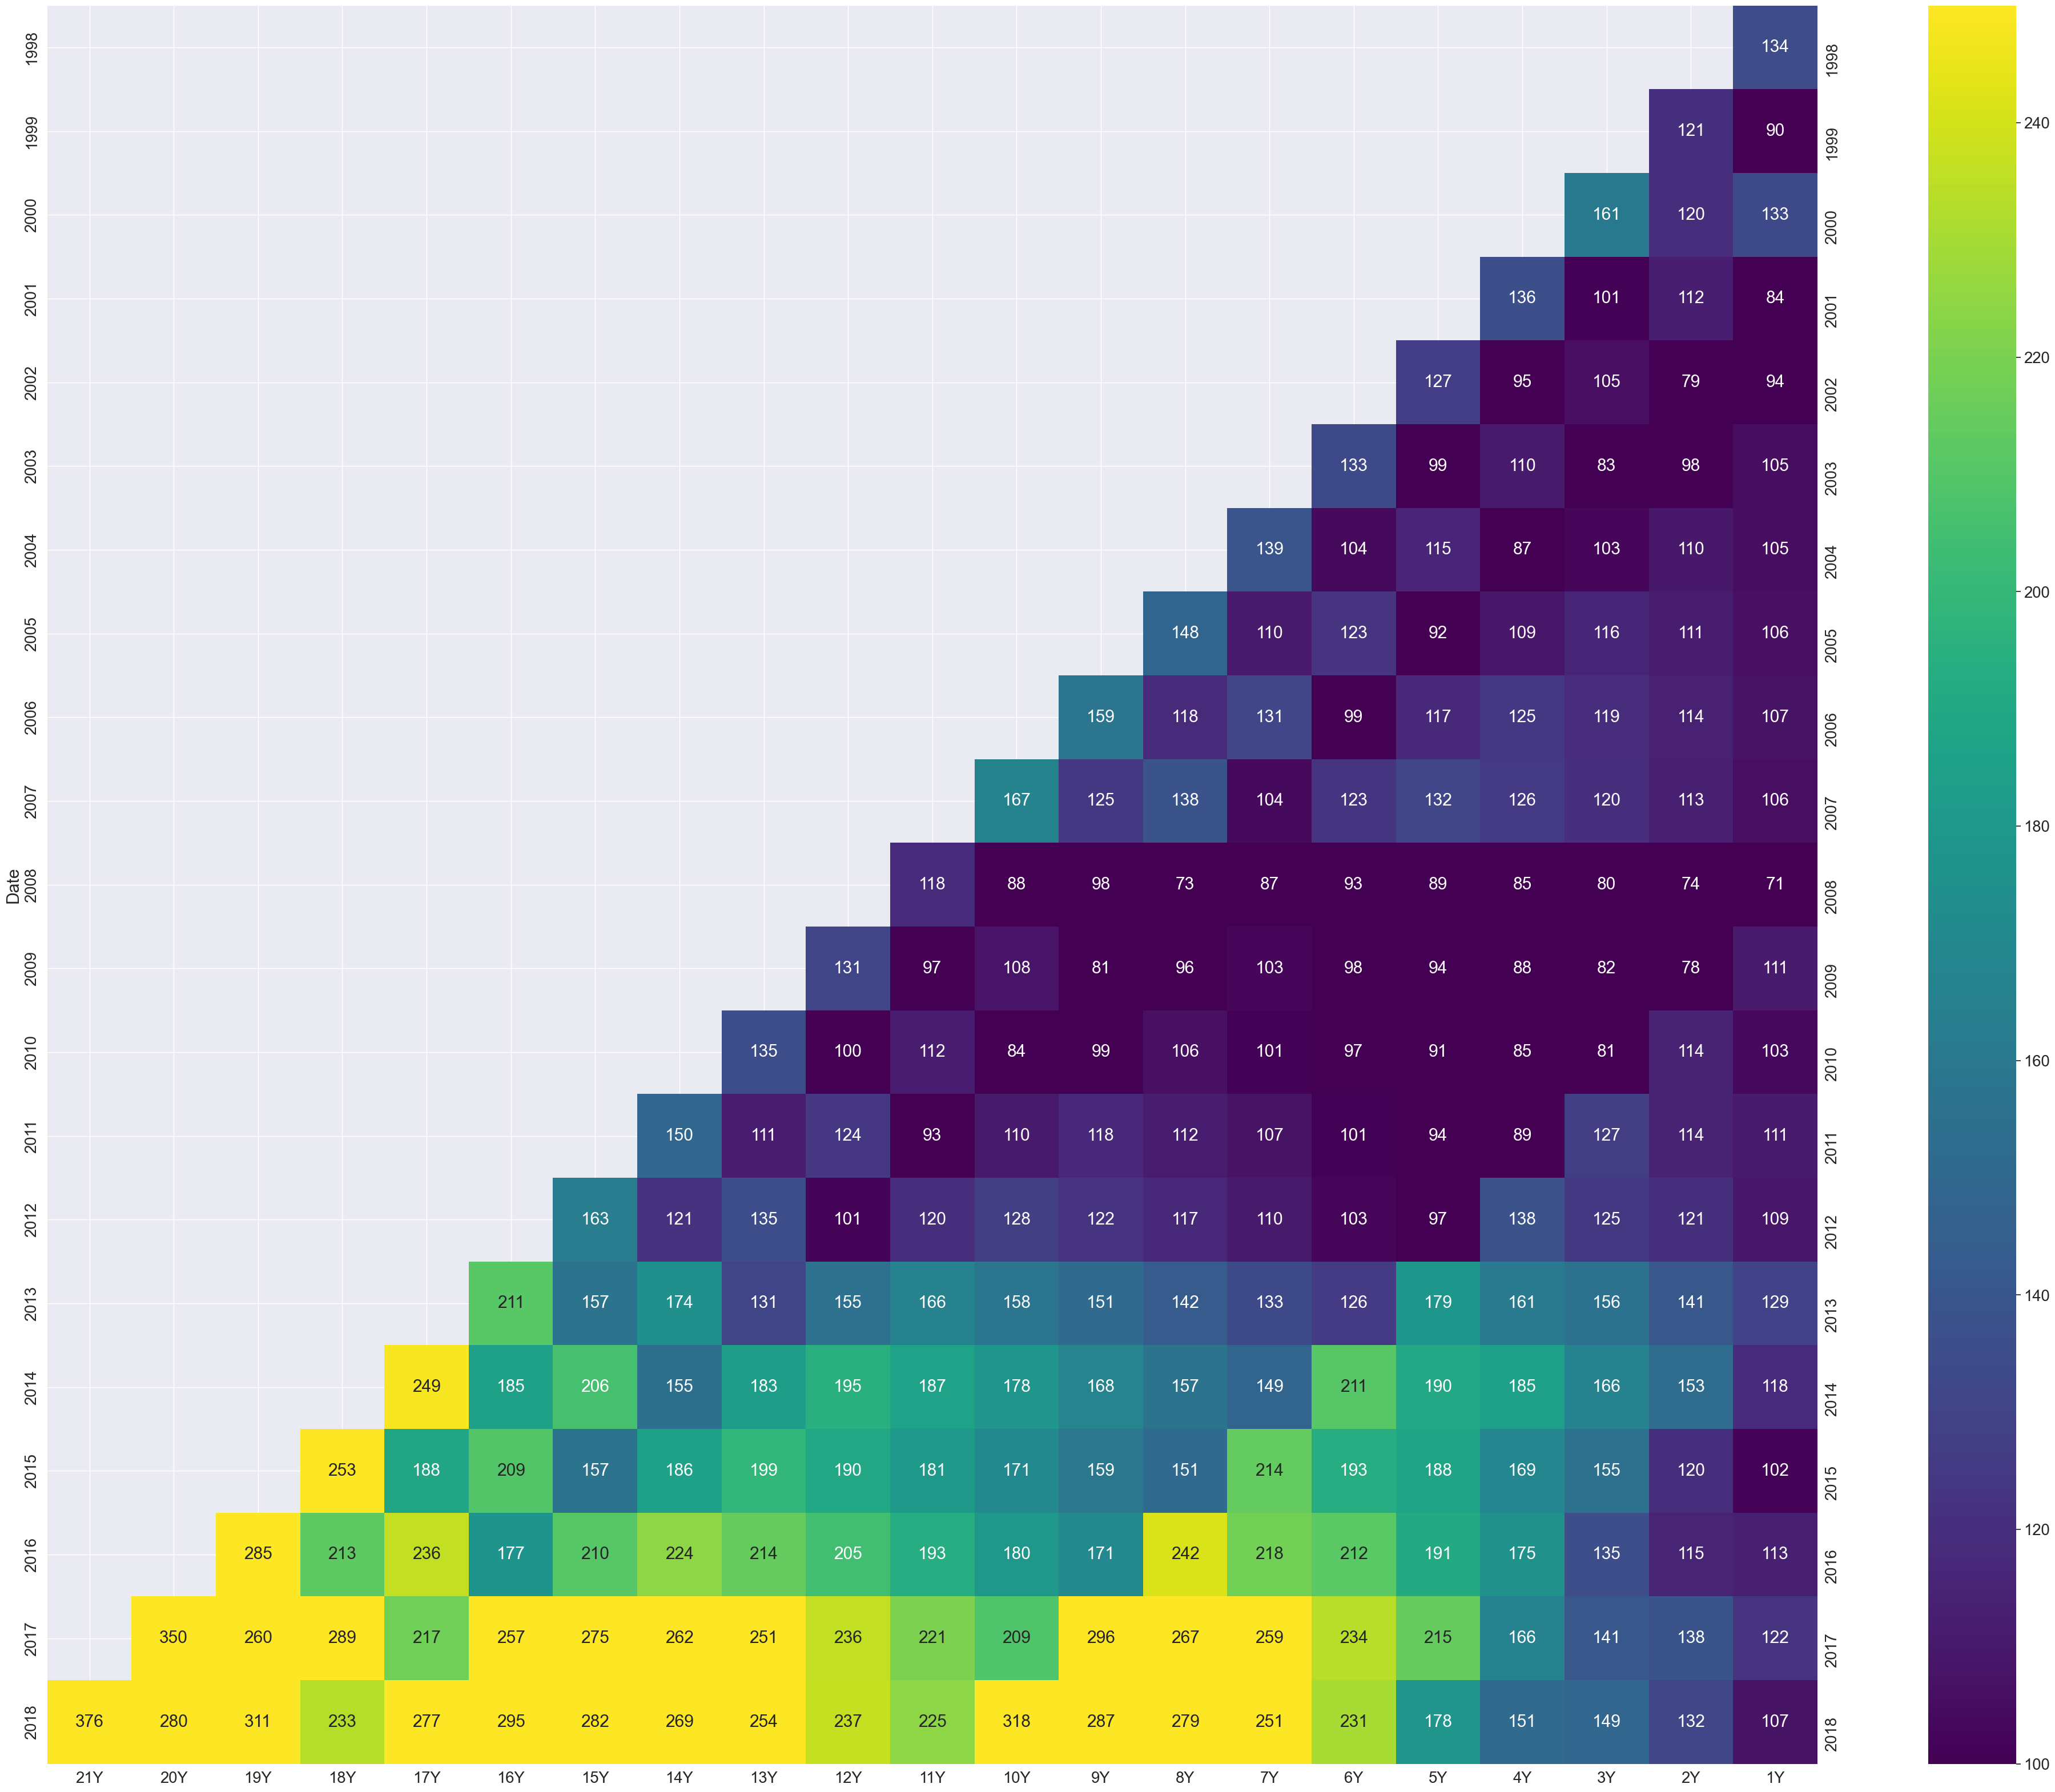

In [27]:
plt.figure(figsize = (50,40))
sns.set(font_scale = 1.8)
sns.heatmap(tri, annot=True, fmt = "0.0f", vmin = 100, vmax=250, center = 175, cmap="viridis")
plt.tick_params(axis = "y", labelright = True)
plt.show()

----------------------------------

Mary did not closely monitor her Portfolio in the past. She is a very self-confident, if not overconfident person. Therefore, you suspect that she overestimates her portfolio´s past performance.

__Step 3: Verify the following statement that she made during the first meeting with your boss: "For investments periods of 6 years or longer, I never lost money with my portfolio!"__ Is she right? 

In [28]:
#NOO

----------------------------------

Once you have analyzed and educated Mary on the past Performance of her Portfolio, your task is to compare her Portfolio with similar designed Portfolios/Indexes of other Sectors (five largest companies). Your colleagues already prepared appropriate indexes for other sectors (sector_indexes.csv). 

__Step 4: Analyze and compare the performance of Mary´s Large-Cap Health Care Portfolio with other sectors for the most recent 4-years period from 2015 until 2018. Provide Mary with an interactive normalized Price Chart where she can play around__! <br>
Hint: Import and use the csv-file "__sector_indexes.csv__"

In [29]:
sector = pd.read_csv("sector_indexes.csv", parse_dates=["Date"], index_col="Date")
sector

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation
Date,,,,,,,,,,
2014-12-31,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2015-01-02,99.395644,100.563200,99.901189,98.998194,99.341910,100.133603,100.077210,100.313579,99.766849,99.358665
2015-01-05,97.446005,99.090963,98.780243,97.864111,97.626686,95.940785,97.222479,99.128530,97.769721,96.619356
2015-01-06,97.266303,98.107726,98.020547,98.480363,96.441893,95.519645,94.800420,99.541975,95.724408,94.659673
2015-01-07,98.119705,99.918267,98.924559,100.025123,98.009663,96.129530,95.350404,100.709962,95.702484,95.213853
...,...,...,...,...,...,...,...,...,...,...
2018-12-21,128.294339,160.672147,133.392708,113.838151,289.218054,107.971222,120.016687,140.646898,183.125405,124.313373
2018-12-24,124.953005,155.392640,126.146687,111.799738,282.378681,104.767882,117.473788,135.757166,181.657546,120.440446
2018-12-26,128.937678,162.756031,130.800422,114.004389,306.694264,110.008730,122.321420,138.186461,193.631716,127.235622


In [30]:
sectors = sector.loc["2014-12-31":"2018-12-31"]

In [31]:
sectors

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation
Date,,,,,,,,,,
2014-12-31,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2015-01-02,99.395644,100.563200,99.901189,98.998194,99.341910,100.133603,100.077210,100.313579,99.766849,99.358665
2015-01-05,97.446005,99.090963,98.780243,97.864111,97.626686,95.940785,97.222479,99.128530,97.769721,96.619356
2015-01-06,97.266303,98.107726,98.020547,98.480363,96.441893,95.519645,94.800420,99.541975,95.724408,94.659673
2015-01-07,98.119705,99.918267,98.924559,100.025123,98.009663,96.129530,95.350404,100.709962,95.702484,95.213853
...,...,...,...,...,...,...,...,...,...,...
2018-12-21,128.294339,160.672147,133.392708,113.838151,289.218054,107.971222,120.016687,140.646898,183.125405,124.313373
2018-12-24,124.953005,155.392640,126.146687,111.799738,282.378681,104.767882,117.473788,135.757166,181.657546,120.440446
2018-12-26,128.937678,162.756031,130.800422,114.004389,306.694264,110.008730,122.321420,138.186461,193.631716,127.235622


In [32]:
cf.go_offline()

In [33]:
sectors["Marys"] = stocks.loc["2014-12-31":"2018-12-31"]
sectors

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Marys
Date,,,,,,,,,,,
2014-12-31,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,372.431677
2015-01-02,99.395644,100.563200,99.901189,98.998194,99.341910,100.133603,100.077210,100.313579,99.766849,99.358665,372.256756
2015-01-05,97.446005,99.090963,98.780243,97.864111,97.626686,95.940785,97.222479,99.128530,97.769721,96.619356,370.695749
2015-01-06,97.266303,98.107726,98.020547,98.480363,96.441893,95.519645,94.800420,99.541975,95.724408,94.659673,371.709074
2015-01-07,98.119705,99.918267,98.924559,100.025123,98.009663,96.129530,95.350404,100.709962,95.702484,95.213853,376.996384
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,128.294339,160.672147,133.392708,113.838151,289.218054,107.971222,120.016687,140.646898,183.125405,124.313373,550.459221
2018-12-24,124.953005,155.392640,126.146687,111.799738,282.378681,104.767882,117.473788,135.757166,181.657546,120.440446,536.059475
2018-12-26,128.937678,162.756031,130.800422,114.004389,306.694264,110.008730,122.321420,138.186461,193.631716,127.235622,556.657932


In [34]:
sectors["Marys"] = (sectors.Marys/sectors.iloc[0,10])*100
sectors

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Marys
Date,,,,,,,,,,,
2014-12-31,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2015-01-02,99.395644,100.563200,99.901189,98.998194,99.341910,100.133603,100.077210,100.313579,99.766849,99.358665,99.953033
2015-01-05,97.446005,99.090963,98.780243,97.864111,97.626686,95.940785,97.222479,99.128530,97.769721,96.619356,99.533894
2015-01-06,97.266303,98.107726,98.020547,98.480363,96.441893,95.519645,94.800420,99.541975,95.724408,94.659673,99.805977
2015-01-07,98.119705,99.918267,98.924559,100.025123,98.009663,96.129530,95.350404,100.709962,95.702484,95.213853,101.225649
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,128.294339,160.672147,133.392708,113.838151,289.218054,107.971222,120.016687,140.646898,183.125405,124.313373,147.801397
2018-12-24,124.953005,155.392640,126.146687,111.799738,282.378681,104.767882,117.473788,135.757166,181.657546,120.440446,143.934984
2018-12-26,128.937678,162.756031,130.800422,114.004389,306.694264,110.008730,122.321420,138.186461,193.631716,127.235622,149.465786


In [35]:
sectors.iplot(theme = "solar")

In [36]:
Returns = np.log(sectors/sectors.shift())
Returns

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Marys
Date,,,,,,,,,,,
2014-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,-0.006062,0.005616,-0.000989,-0.010069,-0.006603,0.001335,0.000772,0.003131,-0.002334,-0.006434,-0.000470
2015-01-05,-0.019810,-0.014748,-0.011284,-0.011522,-0.017417,-0.042774,-0.028940,-0.011884,-0.020221,-0.027957,-0.004202
2015-01-06,-0.001846,-0.009972,-0.007721,0.006277,-0.012210,-0.004399,-0.025228,0.004162,-0.021142,-0.020491,0.002730
2015-01-07,0.008736,0.018286,0.009180,0.015564,0.016125,0.006365,0.005785,0.011665,-0.000229,0.005837,0.014124
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,-0.002622,-0.024446,0.002863,-0.018917,-0.050249,-0.003983,-0.024893,-0.006371,-0.033565,-0.013321,-0.010213
2018-12-24,-0.026389,-0.033411,-0.055852,-0.018069,-0.023932,-0.030117,-0.021416,-0.035385,-0.008048,-0.031650,-0.026508
2018-12-26,0.031391,0.046297,0.036227,0.019528,0.082602,0.048812,0.040437,0.017736,0.063835,0.054885,0.037706


In [37]:
Returns.dropna(inplace=True)

In [38]:
Returns

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Marys
Date,,,,,,,,,,,
2015-01-02,-0.006062,0.005616,-0.000989,-0.010069,-0.006603,0.001335,0.000772,0.003131,-0.002334,-0.006434,-0.000470
2015-01-05,-0.019810,-0.014748,-0.011284,-0.011522,-0.017417,-0.042774,-0.028940,-0.011884,-0.020221,-0.027957,-0.004202
2015-01-06,-0.001846,-0.009972,-0.007721,0.006277,-0.012210,-0.004399,-0.025228,0.004162,-0.021142,-0.020491,0.002730
2015-01-07,0.008736,0.018286,0.009180,0.015564,0.016125,0.006365,0.005785,0.011665,-0.000229,0.005837,0.014124
2015-01-08,0.013707,0.016262,0.017448,0.016592,0.012623,0.021725,0.016484,0.010120,0.008756,0.022387,0.026870
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,-0.002622,-0.024446,0.002863,-0.018917,-0.050249,-0.003983,-0.024893,-0.006371,-0.033565,-0.013321,-0.010213
2018-12-24,-0.026389,-0.033411,-0.055852,-0.018069,-0.023932,-0.030117,-0.021416,-0.035385,-0.008048,-0.031650,-0.026508
2018-12-26,0.031391,0.046297,0.036227,0.019528,0.082602,0.048812,0.040437,0.017736,0.063835,0.054885,0.037706


In [39]:
ann_ret = sectors.resample("A", kind = "period").last()
ann_ret

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Marys
Date,,,,,,,,,,,
2014,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2015,87.013706,104.373781,113.120307,110.757230,161.816269,83.134094,99.059770,99.134299,139.975861,78.540928,101.625008
2016,97.809814,112.782215,109.190855,114.536497,177.372146,106.842698,117.788001,114.123041,144.550111,101.646859,114.788412
2017,127.676970,160.845693,133.015641,135.064073,262.253479,118.131698,148.859425,131.909562,197.344805,129.534133,140.554654
2018,128.764142,164.615353,133.079726,115.079098,308.736328,110.202683,123.067455,139.820547,193.191304,127.699222,151.057184


In [40]:
ann_ret = np.log(ann_ret/ann_ret.shift())
ann_ret

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Marys
Date,,,,,,,,,,,
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,-0.139105,0.042808,0.123282,0.102171,0.481291,-0.184715,-0.009447,-0.008695,0.336300,-0.241550,0.016119
2016,0.116959,0.077480,-0.035355,0.033553,0.091788,0.250903,0.173163,0.140802,0.032156,0.257885,0.121801
2017,0.266478,0.354987,0.197369,0.164856,0.391061,0.100442,0.234116,0.144839,0.311326,0.242440,0.202506
2018,0.008479,0.023166,0.000482,-0.160130,0.163176,-0.069479,-0.190270,0.058243,-0.021272,-0.014267,0.072062


In [41]:
ann_ret.dropna(inplace=True)

In [42]:
ann_ret

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Marys
Date,,,,,,,,,,,
2015,-0.139105,0.042808,0.123282,0.102171,0.481291,-0.184715,-0.009447,-0.008695,0.336300,-0.241550,0.016119
2016,0.116959,0.077480,-0.035355,0.033553,0.091788,0.250903,0.173163,0.140802,0.032156,0.257885,0.121801
2017,0.266478,0.354987,0.197369,0.164856,0.391061,0.100442,0.234116,0.144839,0.311326,0.242440,0.202506
2018,0.008479,0.023166,0.000482,-0.160130,0.163176,-0.069479,-0.190270,0.058243,-0.021272,-0.014267,0.072062


In [43]:
Returns.std().to_frame()

,0
Basic Industries,0.010305
Capital Goods,0.010296
Consumer Durables,0.008990
Consumer Non-Durables,0.008846
Consumer Services,0.014681
Energy,0.012874
Finance,0.012797
Public Utilities,0.008042
Technology,0.014085
Transportation,0.011724


In [44]:
Risk = Returns.std().to_frame()
Risk

,0
Basic Industries,0.010305
Capital Goods,0.010296
Consumer Durables,0.008990
Consumer Non-Durables,0.008846
Consumer Services,0.014681
Energy,0.012874
Finance,0.012797
Public Utilities,0.008042
Technology,0.014085
Transportation,0.011724


In [45]:
Risk.columns = ["Risk"]

In [46]:
Risk

,Risk
Basic Industries,0.010305
Capital Goods,0.010296
Consumer Durables,0.008990
Consumer Non-Durables,0.008846
Consumer Services,0.014681
Energy,0.012874
Finance,0.012797
Public Utilities,0.008042
Technology,0.014085
Transportation,0.011724


In [47]:
ann_Risk = ann_ret.std().to_frame()
ann_Risk

,0
Basic Industries,0.171400
Capital Goods,0.155217
Consumer Durables,0.107991
Consumer Non-Durables,0.140774
Consumer Services,0.184310
Energy,0.191162
Finance,0.191761
Public Utilities,0.073447
Technology,0.185382
Transportation,0.237266


In [48]:
ann_Risk.columns = [ann_Risk]

----------------------------

__Step 5: Compare annualized risk and return based on daily (simple) returns and create an appropriate plot! Calculate the Sharpe Ratio and compare!__  Hint: Assume a risk-free Return of 1.3% p.a. <br>
(In terms of Sharpe Ratio, how did Mary´s Portfolio perform compared to the other Indexes?)

In [49]:
ann_summary = ann_ret.agg(["mean","std"]).T

In [50]:
ann_summary

,mean,std
Basic Industries,0.063203,0.171400
Capital Goods,0.124610,0.155217
Consumer Durables,0.071445,0.107991
Consumer Non-Durables,0.035112,0.140774
Consumer Services,0.281829,0.184310
Energy,0.024288,0.191162
Finance,0.051891,0.191761
Public Utilities,0.083797,0.073447
Technology,0.164628,0.185382
Transportation,0.061127,0.237266


In [51]:
ann_summary.columns = ["Returns","Risk"]
ann_summary

,Returns,Risk
Basic Industries,0.063203,0.171400
Capital Goods,0.124610,0.155217
Consumer Durables,0.071445,0.107991
Consumer Non-Durables,0.035112,0.140774
Consumer Services,0.281829,0.184310
Energy,0.024288,0.191162
Finance,0.051891,0.191761
Public Utilities,0.083797,0.073447
Technology,0.164628,0.185382
Transportation,0.061127,0.237266


In [52]:
daily_summary = Returns.agg(["mean","std"]).T
daily_summary

,mean,std
Basic Industries,0.000252,0.010305
Capital Goods,0.000496,0.010296
Consumer Durables,0.000284,0.008990
Consumer Non-Durables,0.000140,0.008846
Consumer Services,0.001122,0.014681
Energy,0.000097,0.012874
Finance,0.000207,0.012797
Public Utilities,0.000334,0.008042
Technology,0.000655,0.014085
Transportation,0.000243,0.011724


In [53]:
daily_summary.columns = ["d_returns", "d_risk"]

In [54]:
daily_summary

,d_returns,d_risk
Basic Industries,0.000252,0.010305
Capital Goods,0.000496,0.010296
Consumer Durables,0.000284,0.008990
Consumer Non-Durables,0.000140,0.008846
Consumer Services,0.001122,0.014681
Energy,0.000097,0.012874
Finance,0.000207,0.012797
Public Utilities,0.000334,0.008042
Technology,0.000655,0.014085
Transportation,0.000243,0.011724


In [55]:
Reeturns = daily_summary.d_returns.to_frame()

In [56]:
Reeturns

,d_returns
Basic Industries,0.000252
Capital Goods,0.000496
Consumer Durables,0.000284
Consumer Non-Durables,0.000140
Consumer Services,0.001122
Energy,0.000097
Finance,0.000207
Public Utilities,0.000334
Technology,0.000655
Transportation,0.000243


In [57]:
Reeturns["ann_returns"] = ann_summary.Returns
Reeturns

,d_returns,ann_returns
Basic Industries,0.000252,0.063203
Capital Goods,0.000496,0.124610
Consumer Durables,0.000284,0.071445
Consumer Non-Durables,0.000140,0.035112
Consumer Services,0.001122,0.281829
Energy,0.000097,0.024288
Finance,0.000207,0.051891
Public Utilities,0.000334,0.083797
Technology,0.000655,0.164628
Transportation,0.000243,0.061127


In [58]:
Riisk = daily_summary.d_risk.to_frame()

In [59]:
Riisk["ann_risk"] = ann_summary.Risk
Riisk

,d_risk,ann_risk
Basic Industries,0.010305,0.171400
Capital Goods,0.010296,0.155217
Consumer Durables,0.008990,0.107991
Consumer Non-Durables,0.008846,0.140774
Consumer Services,0.014681,0.184310
Energy,0.012874,0.191162
Finance,0.012797,0.191761
Public Utilities,0.008042,0.073447
Technology,0.014085,0.185382
Transportation,0.011724,0.237266


In [60]:
Reeturns.iplot(theme = "solar")

In [61]:
Riisk.iplot(theme="solar")

In [62]:
Risk_free_return = 0.013
Risk_free_risk = 0

In [63]:
rf = [Risk_free_return,Risk_free_risk]

In [64]:
rf[0]

0.013

In [65]:
daily_summary["d_sharpe"] = (daily_summary["d_returns"].sub(rf[0]))/daily_summary["d_risk"]
daily_summary

,d_returns,d_risk,d_sharpe
Basic Industries,0.000252,0.010305,-1.237147
Capital Goods,0.000496,0.010296,-1.214455
Consumer Durables,0.000284,0.008990,-1.414443
Consumer Non-Durables,0.000140,0.008846,-1.453727
Consumer Services,0.001122,0.014681,-0.809070
Energy,0.000097,0.012874,-1.002313
Finance,0.000207,0.012797,-0.999741
Public Utilities,0.000334,0.008042,-1.575083
Technology,0.000655,0.014085,-0.876444
Transportation,0.000243,0.011724,-1.088131


In [66]:
ann_summary["ann_Sharpe"] = (ann_summary["Returns"].sub(rf[0]))/ann_summary["Risk"]
ann_summary

,Returns,Risk,ann_Sharpe
Basic Industries,0.063203,0.171400,0.292900
Capital Goods,0.124610,0.155217,0.719059
Consumer Durables,0.071445,0.107991,0.541200
Consumer Non-Durables,0.035112,0.140774,0.157077
Consumer Services,0.281829,0.184310,1.458569
Energy,0.024288,0.191162,0.059048
Finance,0.051891,0.191761,0.202808
Public Utilities,0.083797,0.073447,0.963924
Technology,0.164628,0.185382,0.817922
Transportation,0.061127,0.237266,0.202839


In [67]:
ann_summary.columns = ["ann_Risk","ann_Risk","ann_Sharpe"]

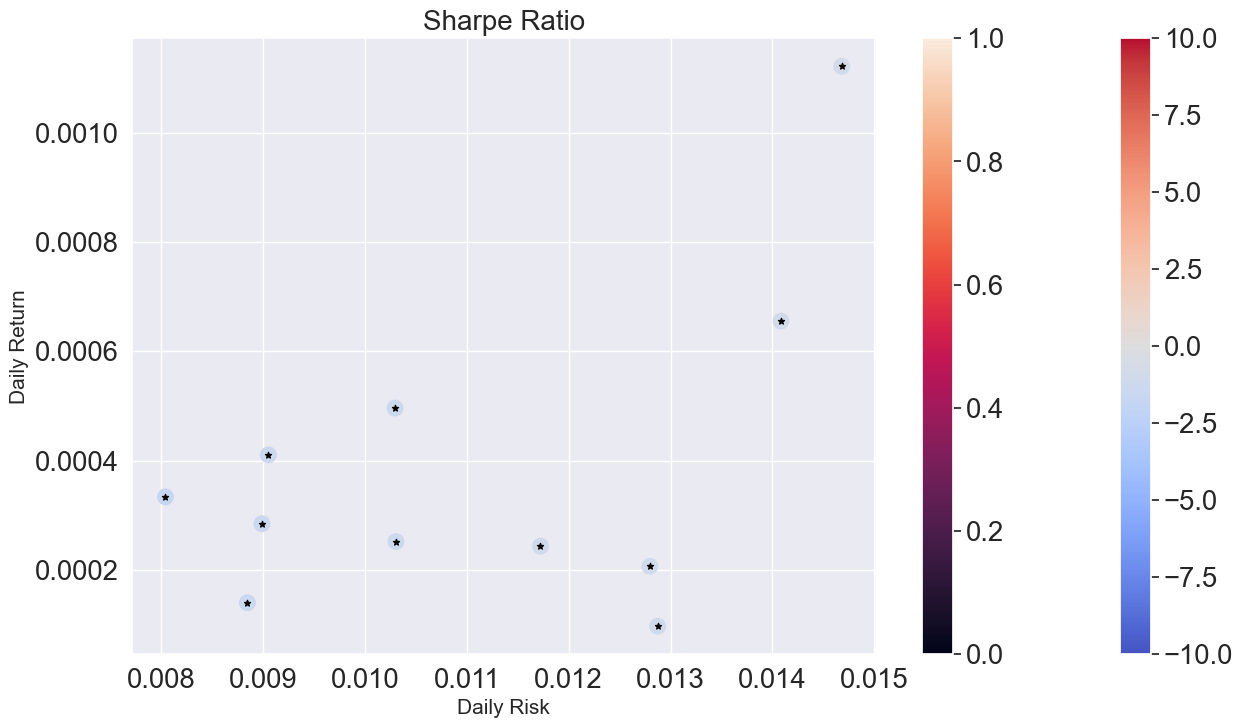

In [68]:
plt.figure(figsize = (15,8))
plt.scatter(x = daily_summary.loc[:,"d_risk"], y = daily_summary.loc[:,"d_returns"],
            c = daily_summary.loc[:, "d_sharpe"], s = 125, cmap="coolwarm", vmin= -10, vmax = 10, alpha=0.95)
plt.colorbar()
plt.scatter(x = daily_summary.loc[:,"d_risk"], y = daily_summary.loc[:,"d_returns"], s = 20,
           marker = "*", c = "black")
plt.colorbar()
plt.xlabel("Daily Risk", fontsize = 15)
plt.ylabel("Daily Return", fontsize = 15)
plt.title("Sharpe Ratio", fontsize = 20)
plt.show()

In [69]:
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

----------------------------------

The results of Step 5 support Mary´s belief that the Health Care Sector is the one and only Sector to be invested in: "Even if the Consumer Services- Sector showed a better Sharpe Ratio and a higher Return than Health Care, the Risk is simply too high!" And there is no benefit to add other Sectors with lower Sharpe Ratio than Health Care - this will not improve the Sharpe Ratio of my portfolio! Therefore, I will stick to my current Stock Portfolio!". Your argument __"Past Performance is no Guarantee / no Indicator of future Results"__ did not impress her much.

__Step 6:  Show Mary that she could have improved the Sharpe Ratio of her Portfolio by adding other Sectors, without increasing the Total Risk of her Portfolio! Educate her on the Portfolio Diversification Effect!__

Hint: Simulate 50,000 random Portfolios (use np.random.seed(111)!) and show the best Portfolio as well as a visual summary of your analysis. 

In [70]:
noa = daily_summary.index.size
noa

11

In [71]:
nop = 50000
nop

50000

In [72]:
np.random.random(nop*noa).reshape(nop,noa)

array([[0.22101385, 0.18905352, 0.85795183, ..., 0.18228675, 0.31064742,
        0.26670931],
       [0.43776304, 0.86962712, 0.90077902, ..., 0.76831615, 0.9895859 ,
        0.27190454],
       [0.4139934 , 0.31395816, 0.23392939, ..., 0.31084703, 0.24382983,
        0.48300025],
       ...,
       [0.19023046, 0.34366724, 0.22782945, ..., 0.31249556, 0.18112803,
        0.16493538],
       [0.13313163, 0.25669869, 0.87337906, ..., 0.69218078, 0.10921238,
        0.45908525],
       [0.33165249, 0.61593364, 0.93999373, ..., 0.84260973, 0.93410713,
        0.11931364]])

In [73]:
np.random.seed(111)
matrix = np.random.random(nop*noa).reshape(nop,noa)
matrix

array([[0.61217018, 0.16906975, 0.43605902, ..., 0.23868214, 0.33765619,
        0.99071246],
       [0.23772645, 0.08119266, 0.66960024, ..., 0.90077418, 0.79396256,
        0.84056965],
       [0.81520746, 0.99095485, 0.57727383, ..., 0.81722006, 0.69772773,
        0.5652854 ],
       ...,
       [0.69799076, 0.56245452, 0.53310837, ..., 0.5478445 , 0.68422447,
        0.3976788 ],
       [0.84992188, 0.57697227, 0.41961015, ..., 0.28252564, 0.53844458,
        0.36460952],
       [0.79130478, 0.07503975, 0.42706009, ..., 0.94834337, 0.06855945,
        0.56065247]])

In [74]:
matrix.sum(axis=1, keepdims = True)

array([[4.4408033 ],
       [5.07786891],
       [6.28566482],
       ...,
       [6.03289705],
       [4.20096521],
       [5.69358736]])

In [75]:
weights = matrix/matrix.sum(axis=1, keepdims=True)
weights

array([[0.13785123, 0.03807189, 0.09819373, ..., 0.05374751, 0.07603494,
        0.22309308],
       [0.04681619, 0.01598951, 0.13186639, ..., 0.17739217, 0.15635744,
        0.16553591],
       [0.12969312, 0.15765315, 0.09183974, ..., 0.13001331, 0.11100301,
        0.08993248],
       ...,
       [0.11569744, 0.09323125, 0.08836689, ..., 0.09080952, 0.11341557,
        0.06591838],
       [0.20231586, 0.13734279, 0.09988422, ..., 0.06725256, 0.12817164,
        0.08679184],
       [0.13898176, 0.0131797 , 0.07500721, ..., 0.16656342, 0.01204152,
        0.09847087]])

In [76]:
weights.sum(axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

In [77]:
port_ret = Returns.dot(weights.T)

In [78]:
port_ret

,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,-0.003277,-0.003224,-0.002684,-0.001226,-0.002304,-0.002024,-0.001700,-0.001098,-0.000268,-0.002508,...,-0.001361,-0.001424,-0.003345,-0.003026,-0.001510,-0.002472,-0.000042,-0.002224,-0.002469,-0.002624
2015-01-05,-0.014412,-0.018430,-0.017177,-0.017835,-0.020299,-0.023101,-0.019430,-0.019563,-0.022161,-0.021640,...,-0.020642,-0.018702,-0.016544,-0.018708,-0.018686,-0.021034,-0.018398,-0.020325,-0.018266,-0.019265
2015-01-06,-0.003084,-0.008589,-0.009076,-0.007953,-0.006409,-0.009757,-0.005705,-0.010693,-0.011742,-0.009777,...,-0.009696,-0.006463,-0.007789,-0.006471,-0.007703,-0.008089,-0.010688,-0.011283,-0.007352,-0.006529
2015-01-07,0.011500,0.008786,0.010484,0.011542,0.011162,0.008877,0.010446,0.010657,0.008857,0.008740,...,0.008686,0.010808,0.010163,0.012058,0.011585,0.008547,0.007791,0.009693,0.010293,0.009341
2015-01-08,0.017874,0.017942,0.016433,0.017556,0.015080,0.019686,0.016850,0.018629,0.016896,0.016142,...,0.015915,0.017540,0.017141,0.015588,0.018603,0.015421,0.014629,0.016411,0.016984,0.015562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,-0.013587,-0.015931,-0.018432,-0.019508,-0.019134,-0.014802,-0.014335,-0.016715,-0.015991,-0.020323,...,-0.017724,-0.014683,-0.020948,-0.024090,-0.015348,-0.015343,-0.016340,-0.019556,-0.013268,-0.017457
2018-12-24,-0.028337,-0.027182,-0.026978,-0.026390,-0.026370,-0.028986,-0.028870,-0.030866,-0.030477,-0.024545,...,-0.029247,-0.030809,-0.022761,-0.023865,-0.031115,-0.028263,-0.027738,-0.027744,-0.029187,-0.025819
2018-12-26,0.038062,0.045667,0.043977,0.043602,0.042806,0.048209,0.041620,0.046822,0.046590,0.050119,...,0.047026,0.044430,0.043781,0.048395,0.043868,0.045068,0.042099,0.047696,0.039948,0.044775


In [79]:
def ann_risk_return(returns_df):
    summmary = returns_df.agg(["mean","std"]).T
    summmary.columns = ["Return","Risk"]
    summmary.Return = summmary.Return*252
    summmary.Risk = summmary.Risk*np.sqrt(252)
    return summmary

In [80]:
port_summary = ann_risk_return(port_ret)

In [81]:
port_summary

,Return,Risk
0,0.091078,0.122006
1,0.094663,0.132879
2,0.100863,0.133475
3,0.101070,0.133584
4,0.102040,0.132142
...,...,...
49995,0.097075,0.133997
49996,0.097499,0.132353
49997,0.107294,0.139548
49998,0.082197,0.129737


In [82]:
weightss = 1/6
weightss

0.16666666666666666

In [83]:
Riturns = stocks.pct_change().dropna()
Riturns

,AGG_price
Date,
1997-01-02,-0.001820
1997-01-03,0.017046
1997-01-06,0.001900
1997-01-07,0.003584
1997-01-08,-0.004294
...,...
2018-12-21,-0.010161
2018-12-24,-0.026160
2018-12-26,0.038426


In [84]:
Riturns = Riturns/6

In [85]:
Riturns

,AGG_price
Date,
1997-01-02,-0.000303
1997-01-03,0.002841
1997-01-06,0.000317
1997-01-07,0.000597
1997-01-08,-0.000716
...,...
2018-12-21,-0.001693
2018-12-24,-0.004360
2018-12-26,0.006404


In [86]:
port_Ret = Riturns

In [87]:
port_summmary = ann_risk_return(port_Ret)
port_summmary

,Return,Risk
AGG_price,0.015374,0.030597


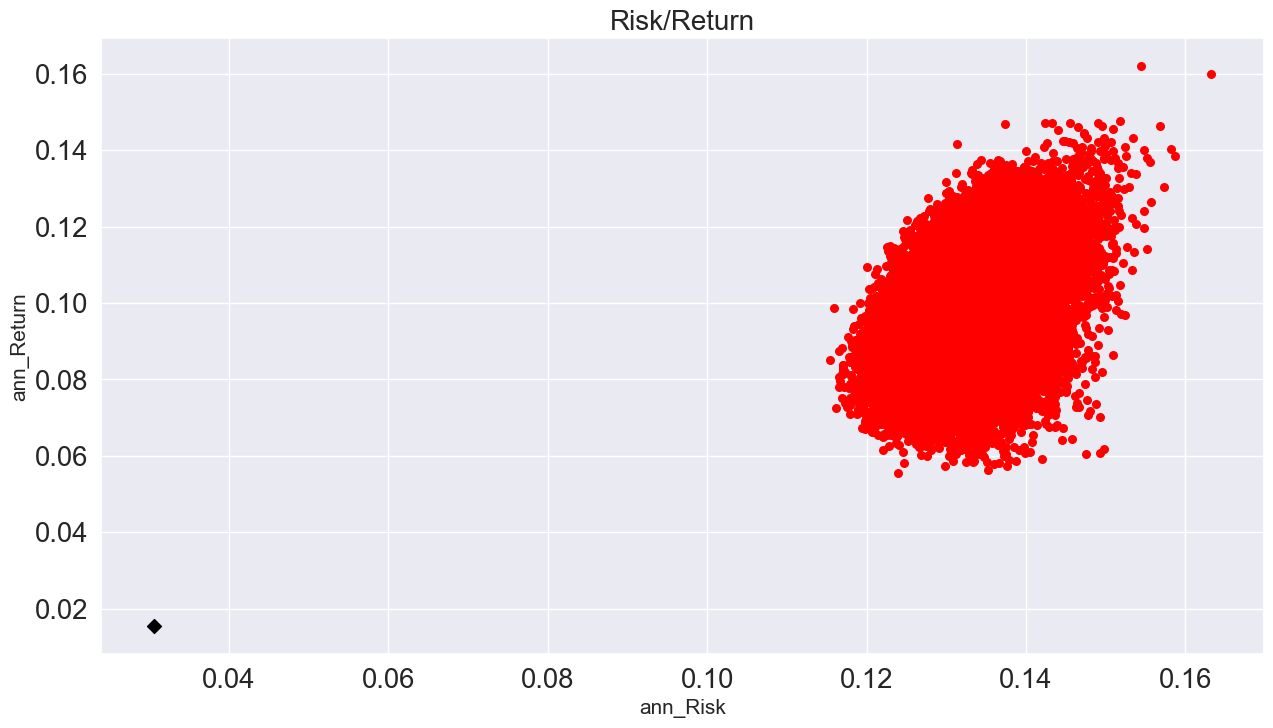

In [88]:
plt.figure(figsize = (15,8))
plt.scatter(x = port_summary.loc[:,"Risk"], y = port_summary.loc[:,"Return"], s = 30, color = "red")
plt.scatter(x = port_summmary.loc[:,"Risk"], y = port_summmary.loc[:,"Return"], s=50, color = "black"
           ,marker = "D")
plt.xlabel("ann_Risk", fontsize = 15)
plt.ylabel("ann_Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

----------------------------------

Congrats! With your analysis, Mary agrees to diversify her Stock Portfolio by adding other Sectors! However, she still does not agree with "Past Performance is no Guarantee / no Indicator of future Results" and "The most valuable Stocks might also be the most overvalued Stocks". Given that Mary is not an easy person and given her considerable Wealth compared to her Lifestyle, you agree with your Boss that you (and Mary´s Portfolio) can live with the results of this first advisory round. Together with Mary, you make the following plan: __Adding those sectors__ to her Stock Portfolio that
- Showed a __positive Alpha__ over the most recent 4-Year Period
- Have a __Beta-Factor below 1__ (non-cyclical / defensive) as Mary expects/fears some Market Turmoil in the near Future. 

__Step 7: Identify Sectors with positive Alpha and a Beta-Factor < 1. Which Sectors will be added to Mary´s Portfolio?__

Hint: Use the S&P 500 Total Return Index as Market Portfolio (SP500_TR.csv).